In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt 

# sns.color_palette("colorblind")
# sns.set_palette(sns.color_palette("colorblind"))
sns.set_palette(sns.color_palette("muted"))

In [168]:
df = pd.read_csv('./datasets/Electronic_sales_Sep2023-Sep2024.csv', sep=',',
                 encoding='utf-8', parse_dates=['Purchase Date'])
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [169]:
df.isna().sum()

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

In [170]:
df.duplicated().sum()

0

In [171]:
df.rename(columns={
    'Customer ID':'customer_id',
    'Age':'age',
    'Gender':'gender',
    'Loyalty Member':'loyalty_member',
    'Product Type':'product_type',
    'SKU':'sku',
    'Rating':'rating',
    'Order Status':'order_status',
    'Payment Method':'payment_method',
    'Total Price':'total_price',
    'Unit Price':'unit_price',
    'Quantity':'quantity',
    'Purchase Date':'purchase_date',
    'Shipping Type':'shipping_type',
    'Add-ons Purchased':'add_pay',
    'Add-on Total':'add_total',
    
}, inplace=True)

In [172]:
df.columns

Index(['customer_id', 'age', 'gender', 'loyalty_member', 'product_type', 'sku',
       'rating', 'order_status', 'payment_method', 'total_price', 'unit_price',
       'quantity', 'purchase_date', 'shipping_type', 'add_pay', 'add_total'],
      dtype='object')

### Задание 1  
На основании датасета для каждого покупателя получите:  
- предпочитаемый метод оплаты;  
-  общие траты;  
- количество денег, потраченных на дополнительные услуги и аксессуары.  

In [112]:
# посмотрим на предпочитаемый метод оплаты в датасете

stat_1 = df['payment_method'].value_counts()\
                             .reset_index()
stat_1['% of total'] = np.round(stat_1['count'] / stat_1['count'].sum() * 100,2)
stat_1

,payment_method,count,% of total
0,Credit Card,5868,29.34
1,Bank Transfer,3371,16.86
2,PayPal,3284,16.42
3,Paypal,2514,12.57
4,Cash,2492,12.46
5,Debit Card,2471,12.35


Преобладает среди методов оплаты кредитная карта 29%, дебиторская карта лишь 12%. 

In [113]:
df.columns

Index(['customer_id', 'age', 'gender', 'loyalty_member', 'product_type', 'sku',
       'rating', 'order_status', 'payment_method', 'total_price', 'unit_price',
       'quantity', 'purchase_date', 'shipping_type', 'add_pay', 'add_total'],
      dtype='object')

In [133]:
stat_1 = (df.groupby(['customer_id', 'payment_method'])
            .agg({'payment_method':'count'})
            .rename(columns={'payment_method':'cnt'})
            .reset_index()
         )
stat_1.sort_values(['cnt'], ascending=False)

,customer_id,payment_method,cnt
15573,18304,PayPal,6
16188,18965,PayPal,5
3056,4192,Debit Card,5
7267,8431,Paypal,4
3769,4867,Cash,4
...,...,...,...
6093,7245,Paypal,1
6094,7247,Cash,1
6095,7247,Debit Card,1
6096,7248,Cash,1


Что-то в датасете данных по юзерам немного

In [126]:
stat_1_end = stat_1.sort_values(['cnt'], ascending=False)\
                   .groupby('customer_id')['payment_method']\
                   .apply(list)
stat_1_end

customer_id
1000                    [Credit Card, Paypal]
1002                      [Cash, Credit Card]
1003                                   [Cash]
1004                            [Credit Card]
1005                     [Debit Card, Paypal]
                         ...                 
19994                         [Bank Transfer]
19995                           [Credit Card]
19996    [PayPal, Credit Card, Bank Transfer]
19997                         [Bank Transfer]
19998                         [Bank Transfer]
Name: payment_method, Length: 12136, dtype: object

In [128]:
df.query('customer_id == 19996')

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add_pay,add_total
19992,19996,27,Female,Yes,Smartphone,SMP234,4,Cancelled,PayPal,4558.72,1139.68,4,2024-01-24,Same Day,Extended Warranty,65.94
19993,19996,27,Female,No,Smartphone,SMP234,1,Cancelled,PayPal,7977.76,1139.68,7,2024-04-11,Expedited,"Extended Warranty, Extended Warranty, Impulse ...",167.20
19994,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98


In [135]:
df.query('customer_id == 18304')

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add_pay,add_total
18096,18304,33,Female,Yes,Smartphone,SMP234,3,Completed,PayPal,4558.72,1139.68,4,2024-01-18,Same Day,NaN,0.00
18097,18304,33,Female,No,Headphones,HDP456,4,Cancelled,PayPal,2528.26,361.18,7,2024-03-08,Expedited,"Impulse Item, Extended Warranty",87.16
18098,18304,33,Female,No,Laptop,LTP123,1,Cancelled,Credit Card,674.32,674.32,1,2024-04-04,Expedited,"Extended Warranty, Extended Warranty, Extended...",128.32
18099,18304,33,Female,No,Laptop,LTP123,5,Completed,PayPal,6743.20,674.32,10,2024-05-13,Expedited,Accessory,71.48
18100,18304,33,Female,No,Headphones,HDP456,1,Cancelled,PayPal,2528.26,361.18,7,2024-05-26,Same Day,"Accessory, Impulse Item, Impulse Item",103.97
18101,18304,33,Female,No,Smartwatch,SWT567,3,Cancelled,PayPal,3216.50,459.50,7,2024-07-29,Same Day,"Extended Warranty, Extended Warranty",67.62
18102,18304,33,Female,Yes,Smartphone,SMP234,1,Completed,PayPal,2279.36,1139.68,2,2024-08-10,Standard,Extended Warranty,40.21
18103,18304,33,Female,No,Headphones,HDP456,5,Completed,Bank Transfer,3250.62,361.18,9,2024-09-16,Same Day,"Impulse Item, Accessory, Impulse Item",231.68


In [140]:
# total spendings
stat_2 = (df.groupby(['customer_id'])
            .agg({'total_price':'sum', 'add_total': 'sum'})
            .rename(columns={'total_price':'sum_total_price', 'add_total': 'sum_add_total'})
            .reset_index()
         )
stat_2['overall_spendings'] = stat_2['sum_total_price'] + stat_2['sum_add_total'] 

In [141]:
stat_2

,customer_id,sum_total_price,sum_add_total,overall_spendings
0,1000,6279.42,66.30,6345.72
1,1002,5020.60,60.16,5080.76
2,1003,41.50,35.56,77.06
3,1004,83.00,65.78,148.78
4,1005,11779.11,75.33,11854.44
...,...,...,...,...
12131,19994,5504.87,93.17,5598.04
12132,19995,5394.56,0.00,5394.56
12133,19996,27296.78,432.12,27728.90
12134,19997,2528.26,101.34,2629.60


*sum_total_price* - суммарные траты по total_price  
*sum_add_total* - суммарные траты по addons, дополнительным тратам   
*overall_spendings* - суммарные траты по total_price и addons

### Задание 2  
#### 1. На основании датасета получите доход:  
- по каждому методу доставки,  
- по каждому типу продукта,  
- по дополнительным услугам за каждый месяц  ,
- по дополнительным услугам за каждый квартал.  


In [146]:
df.columns

Index(['customer_id', 'age', 'gender', 'loyalty_member', 'product_type', 'sku',
       'rating', 'order_status', 'payment_method', 'total_price', 'unit_price',
       'quantity', 'purchase_date', 'shipping_type', 'add_pay', 'add_total'],
      dtype='object')

In [157]:
df.head()

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add_pay,add_total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [155]:
#TODO доход с доставки включает дополнительные траты add_total, ведь так?
shipping_type_earn = df.groupby(['shipping_type'])\
                       .agg({'total_price':'sum', 'add_total':'sum'})\
                       .reset_index()
shipping_type_earn['overall'] = shipping_type_earn['total_price'] + shipping_type_earn['add_total']
shipping_type_earn

,shipping_type,total_price,add_total,overall
0,Expedited,12437526.21,271505.46,12709031.67
1,Express,8685215.62,140687.85,8825903.47
2,Overnight,8704828.17,139033.20,8843861.37
3,Same Day,12432024.82,269538.06,12701562.88
4,Standard,21343073.55,424132.39,21767205.94


In [185]:
product_type_earn = df.groupby(['product_type'])\
                      .agg({'total_price':'sum'}).reset_index()
product_type_earn

,product_type,total_price
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


In [227]:
df['year_month'] = df['purchase_date'].dt.to_period('M')
df['year_quart'] = pd.PeriodIndex(df['purchase_date'].dt.date, freq='Q')

In [228]:
df

,customer_id,age,gender,loyalty_member,product_type,sku,rating,order_status,payment_method,total_price,unit_price,quantity,purchase_date,shipping_type,add_pay,add_total,year_month,year_quart
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,2024-03,2024Q1
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2024-04,2024Q2
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,2023-10,2023Q4
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,2024-08,2024Q3
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,2024-05,2024Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,2024-06,2024Q2
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00,2024-07,2024Q3
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2024-08,2024Q3
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34,2024-01,2024Q1


In [230]:
# доп услуги за каждый месяц
add_monthly_earn = df.groupby(['year_month'])['add_total'].sum().reset_index()
add_monthly_earn

,year_month,add_total
0,2023-09,8012.62
1,2023-10,37837.12
2,2023-11,34888.81
3,2023-12,33509.15
4,2024-01,136195.16
5,2024-02,120148.92
6,2024-03,124954.26
7,2024-04,123973.59
8,2024-05,132018.51
9,2024-06,126689.59


In [231]:
# доп услуги за каждый квартал
add_quarter_earn = df.groupby(['year_quart'])['add_total'].sum().reset_index()
add_quarter_earn

,year_quart,add_total
0,2023Q3,8012.62
1,2023Q4,106235.08
2,2024Q1,381298.34
3,2024Q2,382681.69
4,2024Q3,366669.23


#### 2. Отобразите полученные данные на графике. 

Text(0, 0.5, 'Сумма дохода')

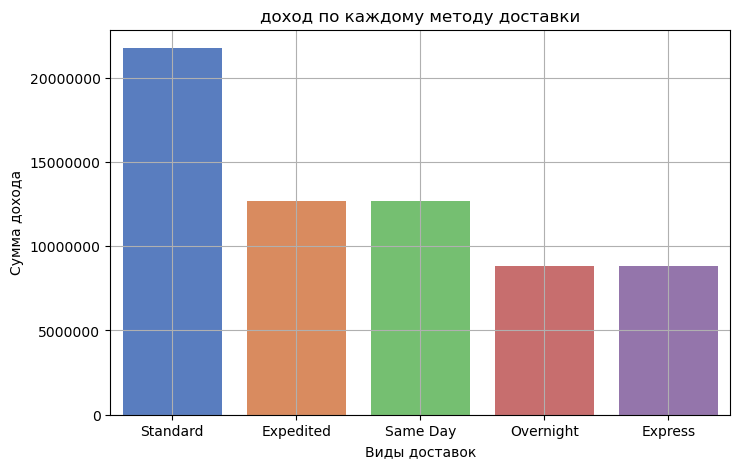

In [259]:
plt.figure(figsize=(8,5))
sns.barplot(x='shipping_type', 
            y='overall', 
            data=shipping_type_earn.sort_values(['overall'], ascending=False)
            )

plt.grid(True)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('доход по каждому методу доставки')
plt.xlabel('Виды доставок')
plt.ylabel('Сумма дохода')

In [206]:
product_type_earn

,product_type,total_price
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


Text(0, 0.5, 'Сумма дохода')

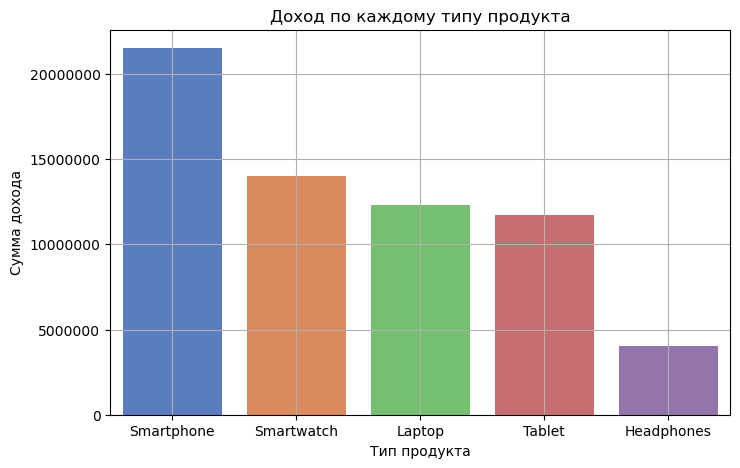

In [260]:
plt.figure(figsize=(8,5))
sns.barplot(x='product_type', 
            y='total_price', 
            data=product_type_earn.sort_values(['total_price'], ascending=False), 
            )

plt.grid(True)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Доход по каждому типу продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Сумма дохода')

In [220]:
add_monthly_earn

,year_month,add_total
0,2023-09-01,8012.62
1,2023-10-01,37837.12
2,2023-11-01,34888.81
3,2023-12-01,33509.15
4,2024-01-01,136195.16
5,2024-02-01,120148.92
6,2024-03-01,124954.26
7,2024-04-01,123973.59
8,2024-05-01,132018.51
9,2024-06-01,126689.59


Text(0, 0.5, 'Сумма дохода')

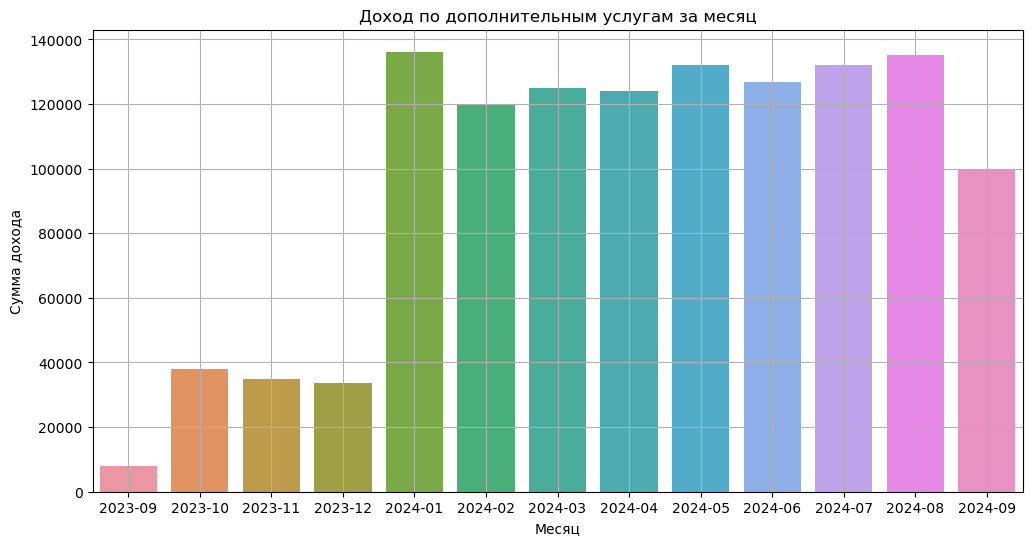

In [261]:
plt.figure(figsize=(12,6))
sns.barplot(x='year_month', 
            y='add_total', 
            data=add_monthly_earn.sort_values(['year_month'], ascending=True)
            )

plt.grid(True)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# plt.xticks(rotation=25)
plt.title('Доход по дополнительным услугам за месяц')
plt.xlabel('Месяц')
plt.ylabel('Сумма дохода')

In [236]:
add_quarter_earn

,year_quart,add_total
0,2023Q3,8012.62
1,2023Q4,106235.08
2,2024Q1,381298.34
3,2024Q2,382681.69
4,2024Q3,366669.23


Text(0, 0.5, 'Сумма дохода')

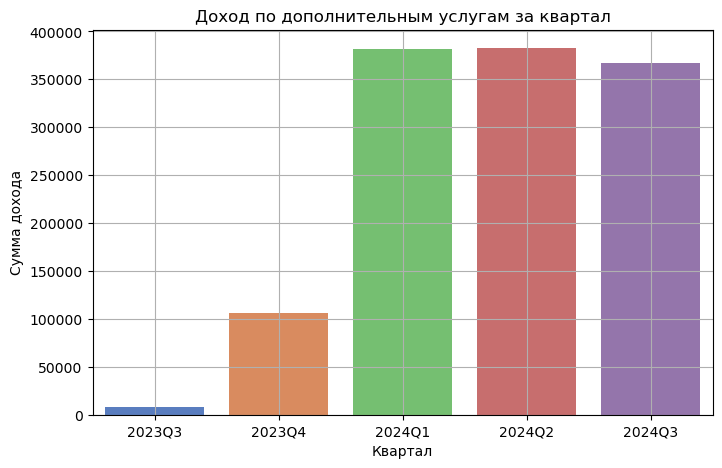

In [262]:
plt.figure(figsize=(8,5))
sns.barplot(x='year_quart', 
            y='add_total', 
            data=add_quarter_earn.sort_values(['year_quart'], ascending=True), 
            )

plt.grid(True)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
# plt.xticks(rotation=25)
plt.title('Доход по дополнительным услугам за квартал')
plt.xlabel('Квартал')
plt.ylabel('Сумма дохода')